# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
import os
import pandas as pd
import os
os.environ['KERAS_BACKEND'] = 'torch'
import keras_core as keras
from models.analytical import SingleOccupationSingleIsotope, MultiOccupationMultiIsotope
from training.utils import CPUModel
from evaluation import load_random_search
from evaluation import plot_df as plot
import matplotlib.pyplot as plt
from evaluation import performance_batch_size_plot

# Batch size performance

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

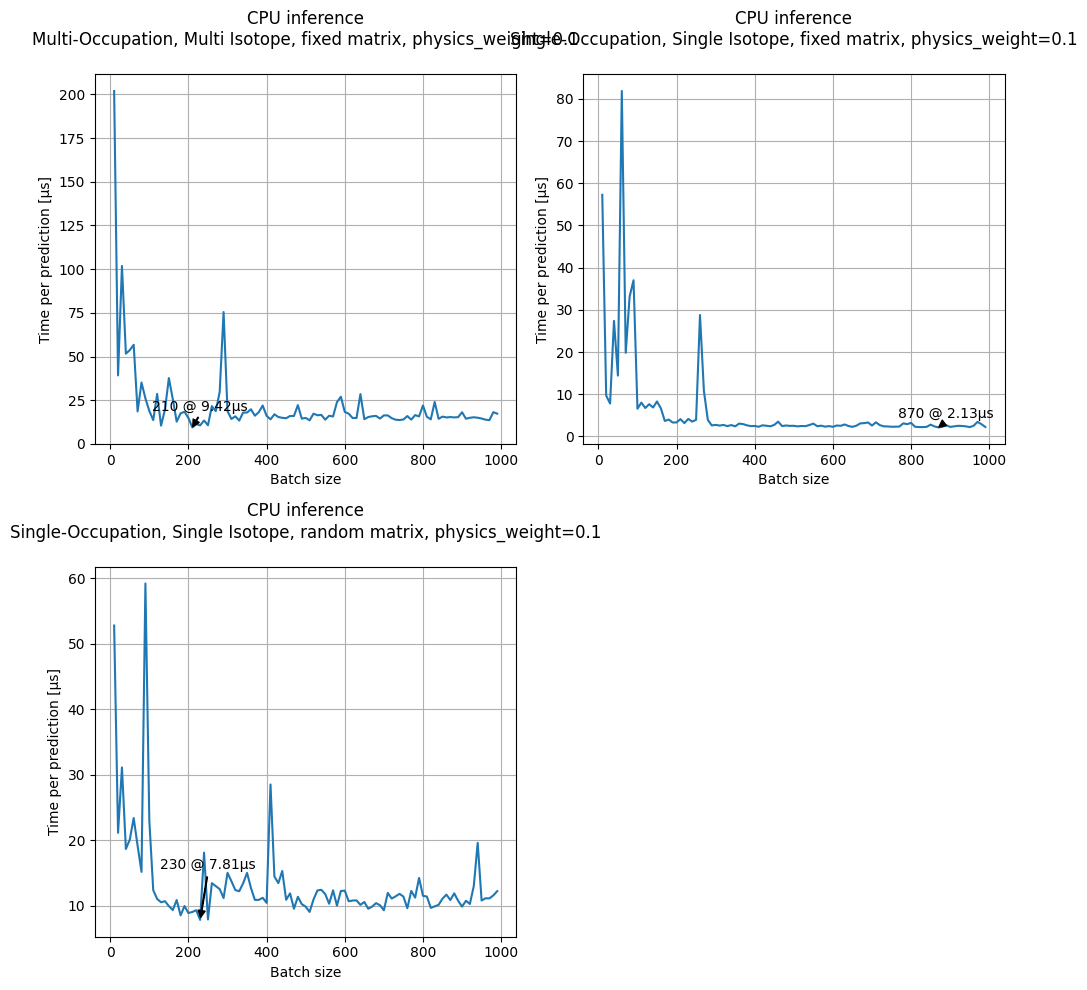

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
momi_physics = keras.models.load_model('trained_models/MOMI_fixed_physics.keras', compile=False)
momi_physics_cpu = CPUModel(momi_physics)
momi_analytical = MultiOccupationMultiIsotope()
performance_batch_size_plot(momi_analytical,momi_physics_cpu)
plt.subplot(2,2,2)
sosi_physics = keras.models.load_model('trained_models/SOSI_fixed_physics.keras', compile=False)
sosi_physics_cpu = CPUModel(sosi_physics)
sosi_analytical = SingleOccupationSingleIsotope()
performance_batch_size_plot(sosi_analytical,sosi_physics_cpu)
plt.subplot(2,2,3)
sosi_physics_random = keras.models.load_model('trained_models/SOSI_random_physics.keras', compile=False)
sosi_physics_random_cpu = CPUModel(sosi_physics_random)
sosi_analytical = SingleOccupationSingleIsotope()
performance_batch_size_plot(sosi_analytical,sosi_physics_random_cpu)
plt.tight_layout()

# Grid Search Analysis

# SOSI fixed

search space restricted to models taking $<15µs$ to infere

In [81]:
df = load_random_search("random_search/15µs")

  0%|          | 0/101 [00:00<?, ?it/s]

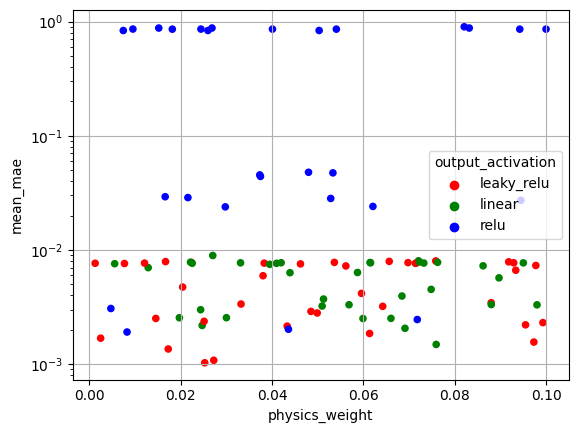

In [82]:
plot(df,"physics_weight","mean_mae","output_activation",logy=True)

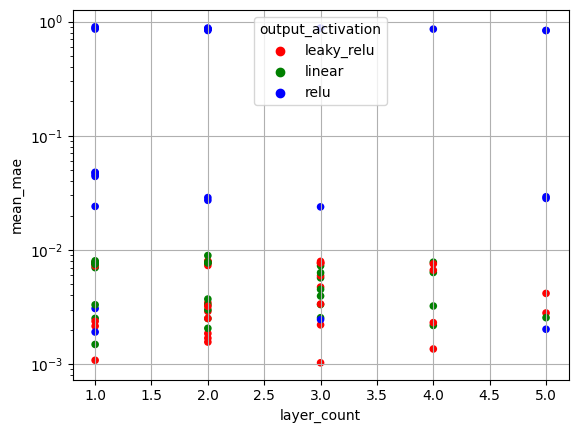

In [70]:
plot(df,
    x="layer_count",
    y="mean_mae",
    c="output_activation",
    logy = True)


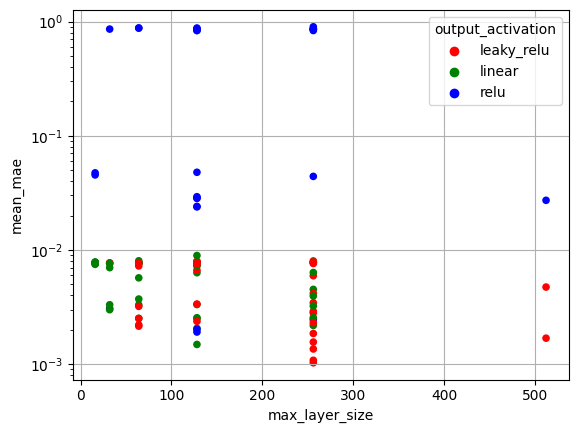

In [71]:
plot(df,
    x="max_layer_size",
    y="mean_mae",
    c="output_activation",
    logy=True,
)

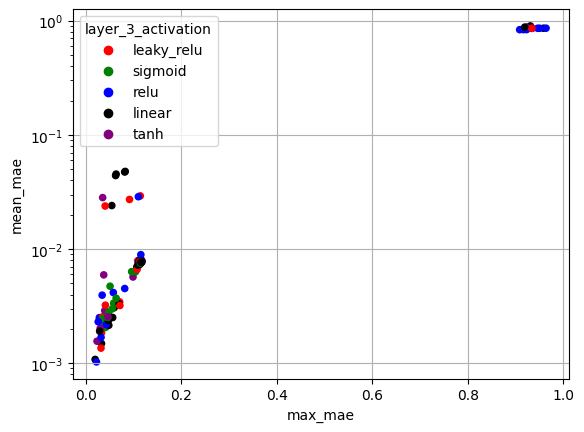

In [72]:
plot(df,
    x="max_mae",
    y="mean_mae",
    c="layer_3_activation",
    logy=True,
)

In [84]:
df = load_random_search("random_search/15µs_leaky_relu")

  0%|          | 0/101 [00:00<?, ?it/s]

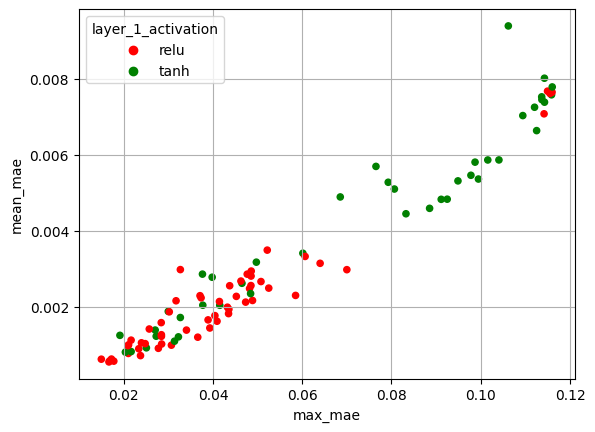

In [85]:
plot(df, "max_mae", "mean_mae", "layer_1_activation")